# Coursera Course Analysis

- Which are the highest rated courses, is there any correlation with the students enrolled?
- Which organizations have more courses
- Which organizations has more ratings
- What's the average rating per organization, which organization have more ratings and more students enrolled?
- How many different coursers are there?
- How is the difficulty relevant?

In [280]:
# Importing libraries and dataset from Coursera Courses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('sample_data/coursea_data.csv', index_col=0).sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### Cleaning and basic exploring

In [281]:
# Tidying up dataset column names by removing course since we already defined that this is a coursera 
# course dataset.

df.columns = df.columns.str.replace('course_', '').str.lower()
df.columns

Index(['title', 'organization', 'certificate_type', 'rating', 'difficulty',
       'students_enrolled'],
      dtype='object')

In [282]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 891 observations and 6 features.


In [283]:
# Checking if there is any empty value in the dataset
df.isnull().any()

title                False
organization         False
certificate_type     False
rating               False
difficulty           False
students_enrolled    False
dtype: bool

In [284]:
# Checking if there is any duplicated in the dataset

df.duplicated().any()

False

In [285]:
# Checking each feature datatype to adjust if needed

df.dtypes

title                 object
organization          object
certificate_type      object
rating               float64
difficulty            object
students_enrolled     object
dtype: object

In [286]:
# Most of the columns might have mixed data types. We will work with string datatype for the
# storing columns: title, organization, certificate_type and course difficuly.
# for the rating and students_enrolled column we need them as floats.

df = df.astype({"title": 'string', "organization": 'string', "certificate_type": 'string', "difficulty": 'string'})
df.dtypes

title                 string
organization          string
certificate_type      string
rating               float64
difficulty            string
students_enrolled     object
dtype: object

In [287]:
# Exploring Certificate_type and course_difficulty column to assure there's not wrong values
df['difficulty'].unique()

<StringArray>
['Beginner', 'Mixed', 'Intermediate', 'Advanced']
Length: 4, dtype: string

In [288]:
df['certificate_type'].unique()

<StringArray>
['PROFESSIONAL CERTIFICATE', 'SPECIALIZATION', 'COURSE']
Length: 3, dtype: string

In [289]:
# Exploring students_enrolled column to convert all to floats
df['students_enrolled']

0      480k
1      310k
2      2.5m
3      1.5m
4      350k
       ... 
886     11k
887     33k
888    6.6k
889     45k
890    6.4k
Name: students_enrolled, Length: 891, dtype: object

In [290]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0

df['students_enrolled'] = df['students_enrolled'].apply(value_to_float)
df['students_enrolled']

0       480000.0
1       310000.0
2      2500000.0
3      1500000.0
4       350000.0
         ...    
886      11000.0
887      33000.0
888       6600.0
889      45000.0
890       6400.0
Name: students_enrolled, Length: 891, dtype: float64

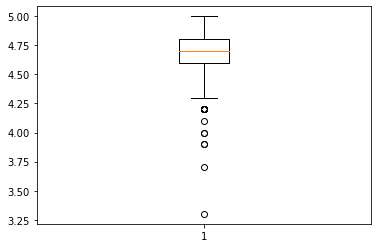

In [291]:
# Checking outliers for rating and students_enrolled
plt.boxplot(df['rating'])
plt.show()

In [292]:
# Most of the courses are rated between 4.70 and 4.75 roughly. 

In [293]:
# Checking all courses less than 4.25
df[df['rating'] < 4.25]

,title,organization,certificate_type,rating,difficulty,students_enrolled
178,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
339,Introduction to Spreadsheets and Models,University of Pennsylvania,COURSE,4.2,Mixed,76000.0
345,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,COURSE,4.2,Mixed,12000.0
352,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
472,Optical Engineering,University of Colorado Boulder,SPECIALIZATION,4.2,Advanced,6200.0
550,Mastering Data Analysis in Excel,Duke University,COURSE,4.2,Mixed,280000.0
569,Foundations of Marketing Analytics,Emory University,SPECIALIZATION,4.2,Intermediate,27000.0
609,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34000.0
618,Unity XR: How to Build AR and VR Apps,Unity,SPECIALIZATION,4.2,Beginner,12000.0
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000.0


In [294]:
print(f"Only {len(df[df['rating'] < 4.25])} courses are under 4.25 rating points")

Only 17 courses are under 4.25 rating points


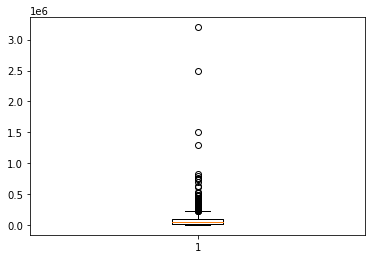

In [295]:
# Let's observe how the data for the students enrolled is distributed
plt.boxplot(df['students_enrolled'])
plt.show()

In [296]:
# Most of the courses has less than 250.000 students enrolled. Not considering courses above 250.000 students
# enrolled an outlier

In [297]:
# Checking all courses more than 250.000 students enrolled
df[df['students_enrolled'] < 250000]

,title,organization,certificate_type,rating,difficulty,students_enrolled
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220000.0
11,Excel Skills for Business,Macquarie University,SPECIALIZATION,4.9,Beginner,240000.0
12,IBM Applied AI,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,220000.0
21,COVID-19 Contact Tracing,Johns Hopkins University,COURSE,4.9,Beginner,220000.0
22,Data Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.6,Intermediate,120000.0
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11000.0
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33000.0
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6600.0
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45000.0


In [298]:
print(f"{len(df[df['students_enrolled'] < 250000])} courses are under 250.000 students enrolled")

821 courses are under 250.000 students enrolled


In [299]:
# Let's quick check which courses are over 250.000 students enrolled
df[df['students_enrolled'] > 250000]

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0
...,...,...,...,...,...,...
385,Grammar and Punctuation,"University of California, Irvine",COURSE,4.7,Mixed,430000.0
474,Competitive Strategy and Organization Design,Ludwig-Maximilians-Universität München (LMU),SPECIALIZATION,4.7,Intermediate,350000.0
550,Mastering Data Analysis in Excel,Duke University,COURSE,4.2,Mixed,280000.0
552,Finanzas personales,Universidad Nacional Autónoma de México,COURSE,4.8,Mixed,310000.0


In [300]:
print(f" There's {len(df['difficulty'].unique())} types of difficulty level and {len(df['certificate_type'].unique())} types of certificates")

 There's 4 types of difficulty level and 3 types of certificates


In [301]:
df.head()

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0


## Exploring further the data and visualizing some relevant data



- General description of ratings and students enrolled columns.

- Which courses has more students enrolled?

In [302]:
# We will describe the values in the rating column
df['rating'].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: rating, dtype: float64

In [303]:
# The minimum rating course is 3.30 points and the maximum possible rating points is 5.0

In [304]:
# We will describe the most frequent rating value
df['rating'].mode()

0    4.8
Name: rating, dtype: float64

In [305]:
# Most of the courses has a 4.8 rating

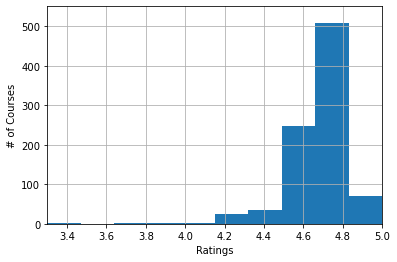

In [309]:
# Visualizing the distribution of the data

hist_ratings = df['rating'].values
plt.hist(hist_ratings, 10)
plt.xlabel('Ratings')
plt.ylabel('# of Courses')
plt.grid(True)
ax = plt.gca()
ax.axis([3.30, 5.0, 0, 550])
plt.show()

In [310]:
# Most of the courses fall between the 4.60 and 4.90 rating points. 

In [311]:
# We will describe the values in the enrolled students column
df['students_enrolled'].describe()

count    8.910000e+02
mean     9.055208e+04
std      1.819365e+05
min      1.500000e+03
25%      1.750000e+04
50%      4.200000e+04
75%      9.950000e+04
max      3.200000e+06
Name: students_enrolled, dtype: float64

In [312]:
# The minimum value fo students enrolled is 1500 students and the maximum is 3.2 milion students enrolled.

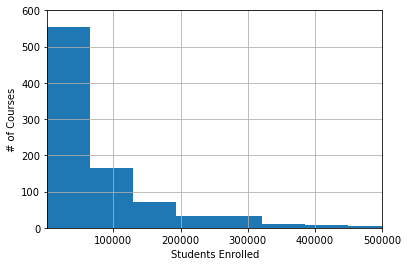

In [364]:
# Visualizing the distribution of the data
plt.figure()
hist_students = df['students_enrolled'].values
plt.hist(hist_students, 50)
plt.xlabel('Students Enrolled')
plt.ylabel('# of Courses')
plt.grid(True)
ax = plt.gca()
ax.axis([df['students_enrolled'].min(), 500000, 0, 600])
plt.show()

Text(0.5, 1.0, 'Correlation between ratings and students enrolled')

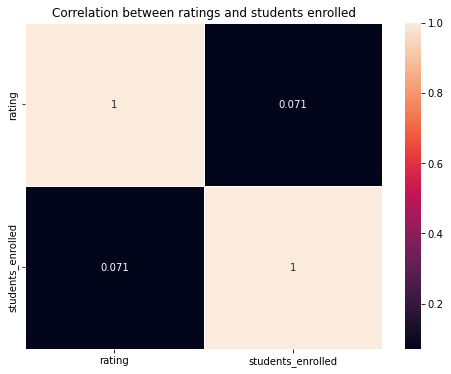

In [365]:
import seaborn as sns

correlation = df.corr()
correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')
plt.title('Correlation between ratings and students enrolled')

Text(0.5, 1.0, 'Relationship between ratings and students enrolled')

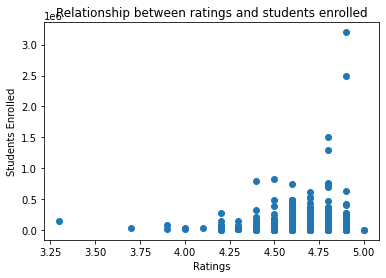

In [366]:
# Let's go further visualizing correlation with a scatter plot

x = np.array([df['rating']])
y = np.array([df['students_enrolled']])

plt.figure()
plt.scatter(x, y)
plt.xlabel("Ratings")
plt.ylabel("Students Enrolled")
plt.title('Relationship between ratings and students enrolled')

In [367]:
# Cleare we can see that the correlation between rating and students_enrolled is very low
# but generally the courses that are higher rated has a higher mean of students enrolled
# as per previous variables.

In [368]:
# Which courses has more students enrolled? As per our previous boxplot I will filter only those
# courses with more than 1M students enrolled. 
df[df['students_enrolled'] > 1000000]

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0


- Which type of certificate is more popular?
- Which type of certificate students tend to enroll to?


- How is the difficulty relevant?
- How many types of certificates are there


- How many organizations are doing courses?
- What organizations have more courses? and which ones less?
- How many courses of each certificate type have each organization?
- What's the average rating per organization and which organization have the highest 
ratings average and more students enrolled? Which one has the lowest students enrolled and have the highest ratings?
- Which are the TOP organizations?
- Which organizations has more students enrolled?

In [369]:
# Let's get some insights from each certificate type

# average ratings per certificate type
# average students enrolled per certificate type

certificate_count = df['certificate_type'].value_counts()
certificate_count

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: certificate_type, dtype: Int64

Text(0.5, 1.0, 'Certification types')

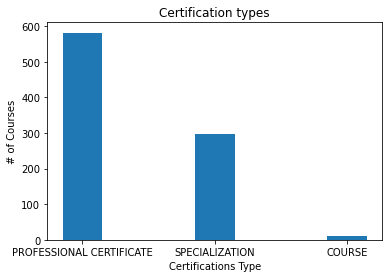

In [370]:
# Let's plot the certificates count

plt.figure()
plt.bar(df['certificate_type'].unique(), certificate_count, width=0.3)
plt.xlabel("Certifications Type")
plt.ylabel("# of Courses")
plt.title("Certification types")

In [371]:
difficulty_count = df['difficulty'].value_counts()
difficulty_count

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: difficulty, dtype: Int64

Text(0.5, 1.0, 'Difficulty')

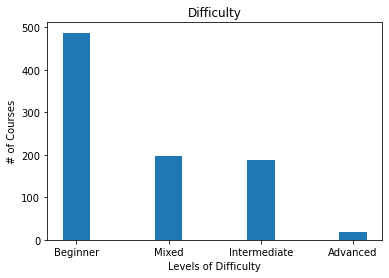

In [372]:
# Let's visualize the num of courses based on difficulty
plt.figure()
plt.bar(df['difficulty'].unique(), difficulty_count, width=0.3)
plt.xlabel("Levels of Difficulty")
plt.ylabel("# of Courses")
plt.title("Difficulty")

In [355]:
# How many organizations are doing courses at Coursera?
print(f" There's {len(df['organization'].unique())} organizations that has courses in Coursera")

 There's 154 organizations that has courses in Coursera


In [356]:
# What organizations have more courses at Coursera? 

org_courses = df['organization'].value_counts().sort_values(ascending=False)
org_courses
# Organizations that has more than 1 course


University of Pennsylvania                      59
University of Michigan                          41
Google Cloud                                    34
Duke University                                 28
Johns Hopkins University                        28
                                                ..
Bloomsbury Learning Exchange                     1
JetBrains                                        1
Nanyang Technological University, Singapore      1
Royal Holloway, University of London             1
American Institute of Business and Economics     1
Name: organization, Length: 154, dtype: Int64

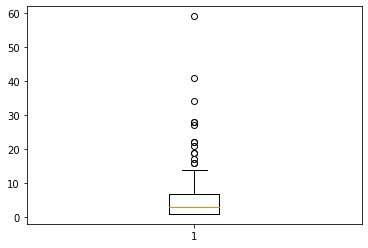

In [357]:
# Let's quick check how the data is distributed with a box plot
plt.boxplot(org_courses)
plt.show()

In [358]:
# Most of the organizations has less than 15 courses in Coursera.

In [359]:
# What's the average rating per organization?
organizations_rat_students = df[['organization', 'rating', 'students_enrolled']].groupby('organization').mean().sort_values(by='rating', ascending=False)
organizations_rat_students

,rating,students_enrolled
organization,,
Hebrew University of Jerusalem,4.900,95000.0
"Nanyang Technological University, Singapore",4.900,47000.0
Universidade Estadual de Campinas,4.900,17000.0
Crece con Google,4.900,8800.0
London Business School,4.900,57000.0
...,...,...
Luther College at the University of Regina,4.400,18000.0
Unity,4.350,9050.0
New York Institute of Finance,4.300,8950.0


In [360]:
# df.groupby('artist')['album'].count().sort_values(ascending=False)
# [org for org in df['organization'].unique()]

In [361]:
# What's the average of students enrolled for ratings under 4.25? 
# Which are the highest rated courses is there any correlation with the students enrolled?
df[df['rating'] < 4.25]

mean_low_ratings = df.loc[(df['rating'] < 4.25), 'students_enrolled'].mean()
mean_high_ratings = df.loc[((df['rating'] > 4.25)), 'students_enrolled'].mean()
mean_low_ratings, mean_high_ratings

(57482.35294117647, 91195.30892448513)